# Subplots

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

plt.subplot?
## nrows = , ncols = , index = 

<IPython.core.display.Javascript object>


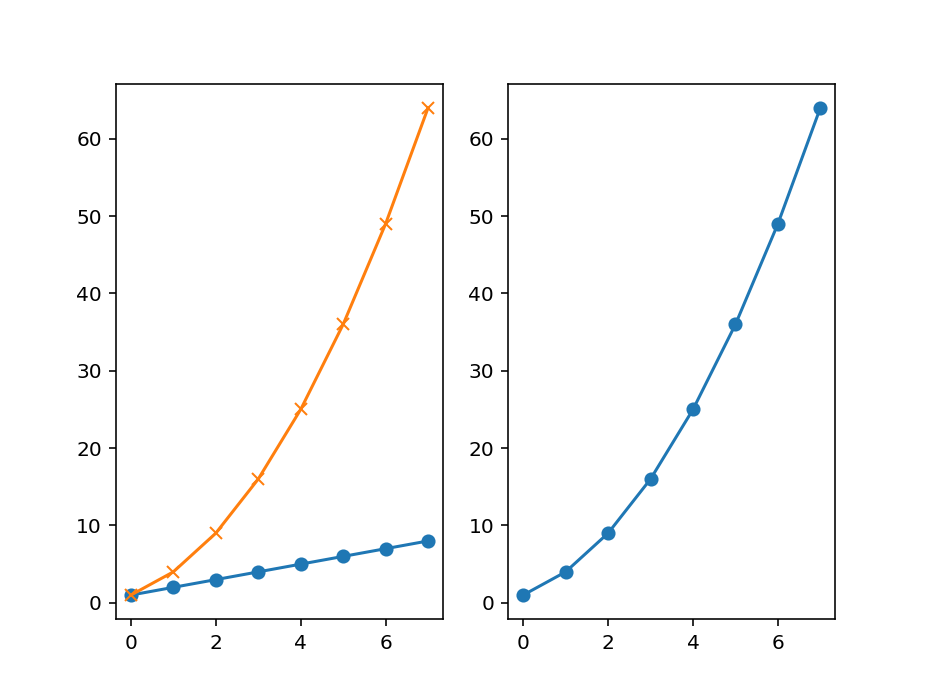

In [10]:
plt.figure()
# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
plt.subplot(1, 2, 1)

linear_data = np.array([1,2,3,4,5,6,7,8])

plt.plot(linear_data, '-o')

In [11]:
exponential_data = linear_data**2 

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
plt.subplot(1, 2, 2)
plt.plot(exponential_data, '-o')
## It might be misleading when they have different scale in y or x axis until we put them in same plot

In [12]:
# plot exponential data on 1st subplot axes
plt.subplot(1, 2, 1)
plt.plot(exponential_data, '-x')

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


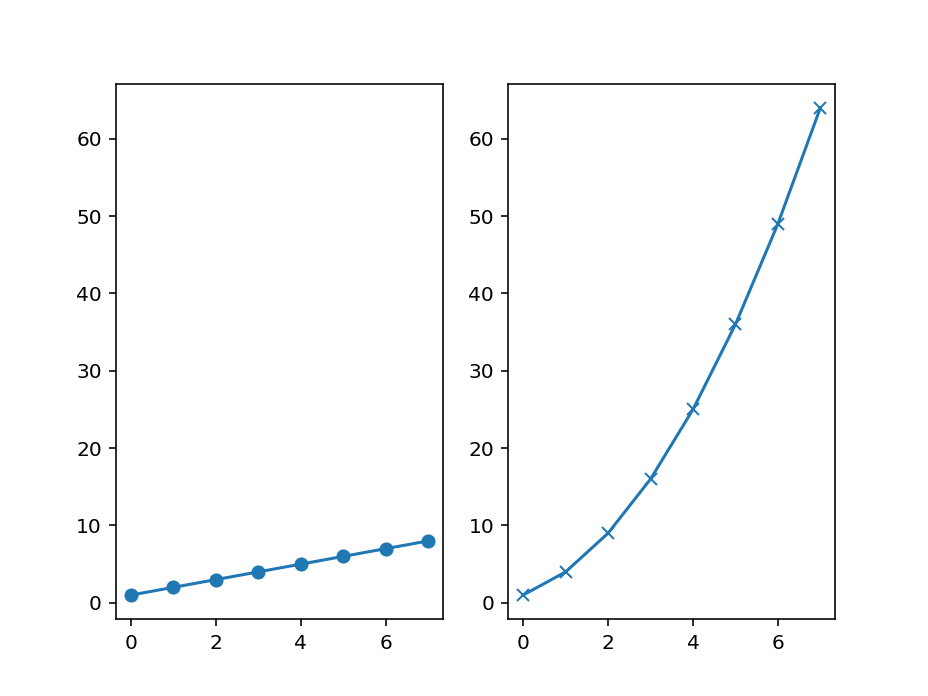

In [13]:
plt.figure()
ax1 = plt.subplot(1, 2, 1)
plt.plot(linear_data, '-o')
# pass sharey=ax1 to ensure the two subplots share the same y axis
ax2 = plt.subplot(1, 2, 2, sharey=ax1)  ## not necessary to assign to ax2
## pyplot is going to get the current axis object with gca, so call plt.plot() will transparently work with last axis we are using
plt.plot(exponential_data, '-x')

<IPython.core.display.Javascript object>


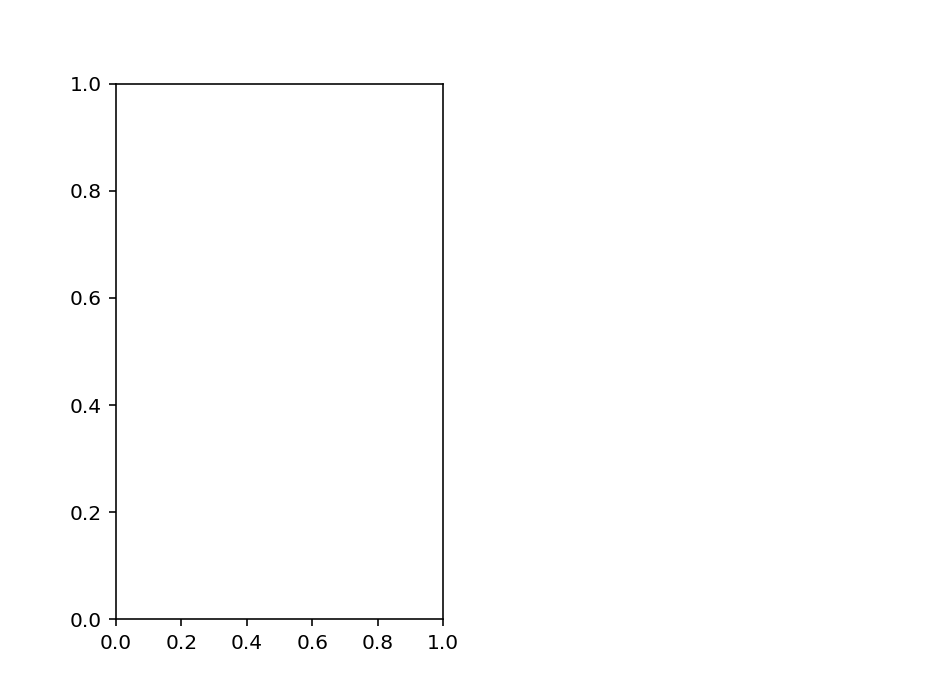

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


True

In [14]:
plt.figure()
# the right hand side is equivalent shorthand syntax
plt.subplot(1,2,1) == plt.subplot(121)

<IPython.core.display.Javascript object>


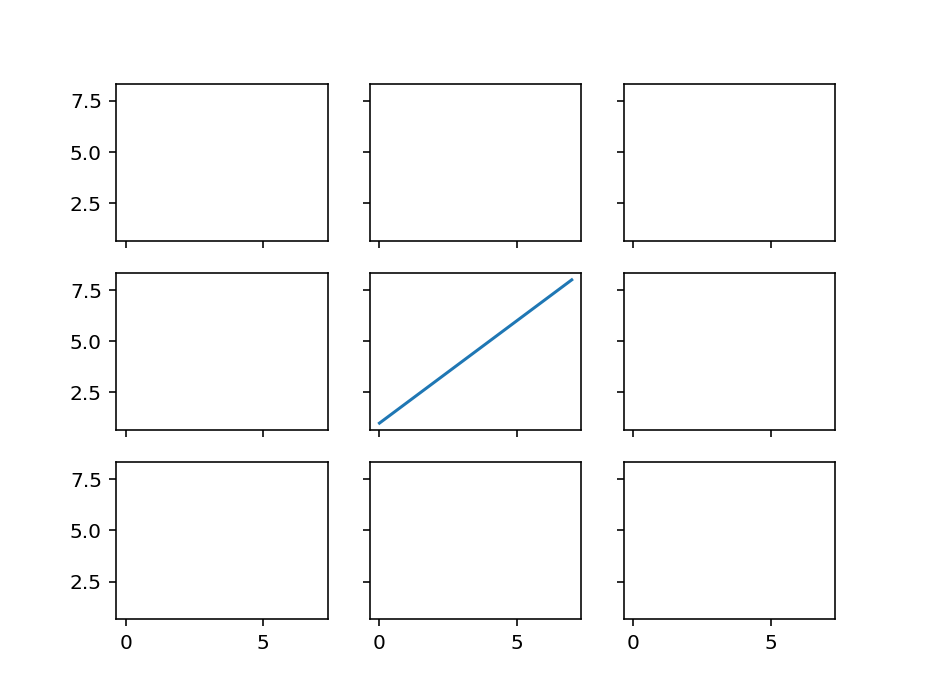

In [55]:
# create a 3x3 grid of subplots
## Important Note: the plot location in the matrix of items is index starting at one instead of 0
fig, ((ax1,ax2,ax3), (ax4,ax5,ax6), (ax7,ax8,ax9)) = plt.subplots(3, 3, sharex=True, sharey=True)
## Notice the function is plt.subplots() plural form
# plot the linear_data on the 5th subplot axes 
ax5.plot(linear_data, '-')

In [49]:
# plt.figure()
# test = plt.subplot(3, 3, 5)
# test.plot(linear_data, '-')
# plt.plot(linear_data, '-')  ## which is the same as above

In [56]:
## Note that the above grid plots turn off the x and y labels
# set inside tick labels to visible
for ax in plt.gcf().get_axes():
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)

In [57]:
# necessary on some systems to update the plot
plt.gcf().canvas.draw()

# Histograms

<IPython.core.display.Javascript object>


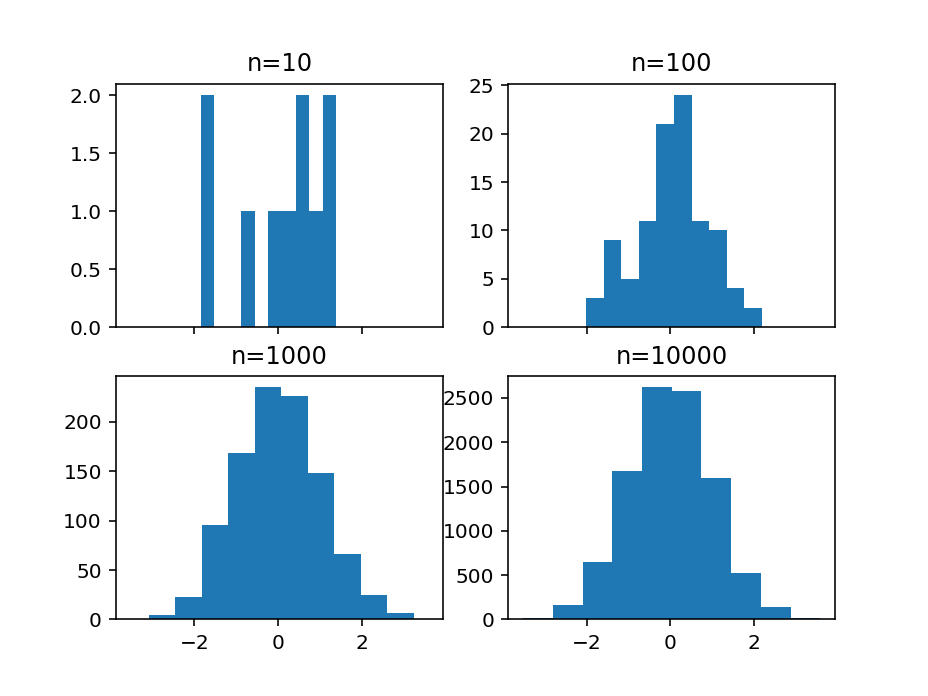

In [3]:
## probability density function/plot, histogram
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

# draw n = 10, 100, 1000, and 10000 samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample)
    axs[n].set_title('n={}'.format(sample_size))
## Note that the bin width for 10000 size is wider than smaller sample size
## Because more observations are gathered into the same bin when binsize is fixed

<IPython.core.display.Javascript object>


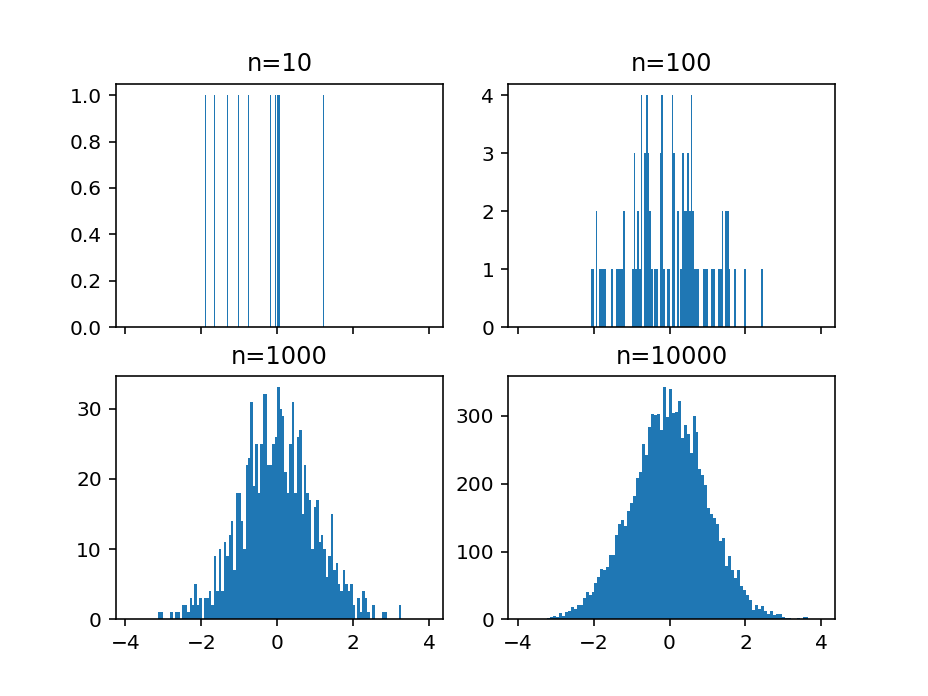

In [4]:
# repeat with number of bins set to 100
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

for n in range(0,len(axs)):
    sample_size = 10**(n+1)
    sample = np.random.normal(loc=0.0, scale=1.0, size=sample_size)
    axs[n].hist(sample, bins=100)
    axs[n].set_title('n={}'.format(sample_size))

<IPython.core.display.Javascript object>


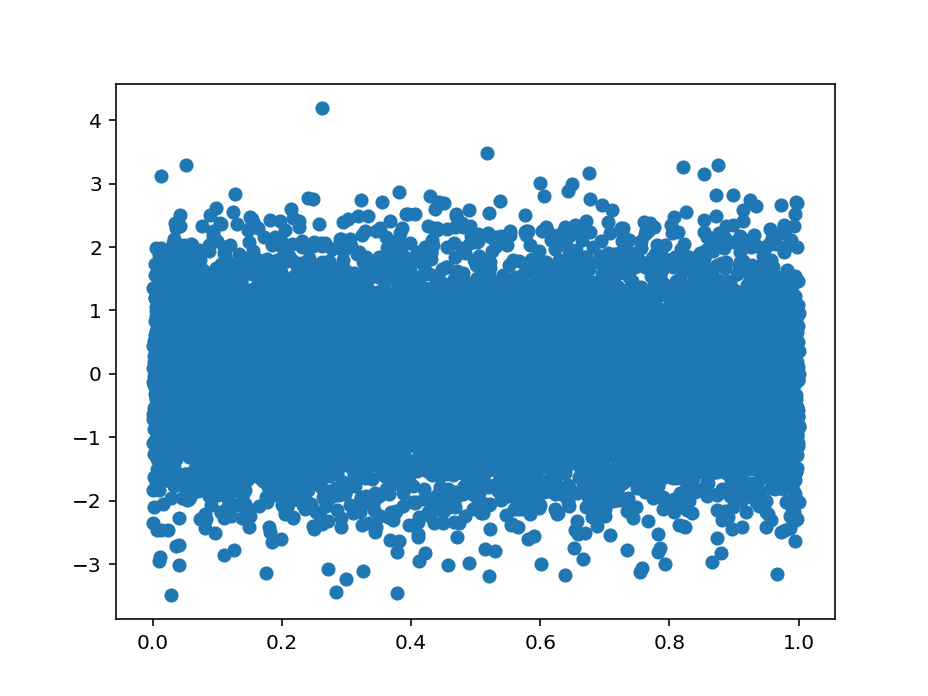

In [5]:
plt.figure()
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
plt.scatter(X,Y)
## mixed plots of random and normal distribution

<IPython.core.display.Javascript object>


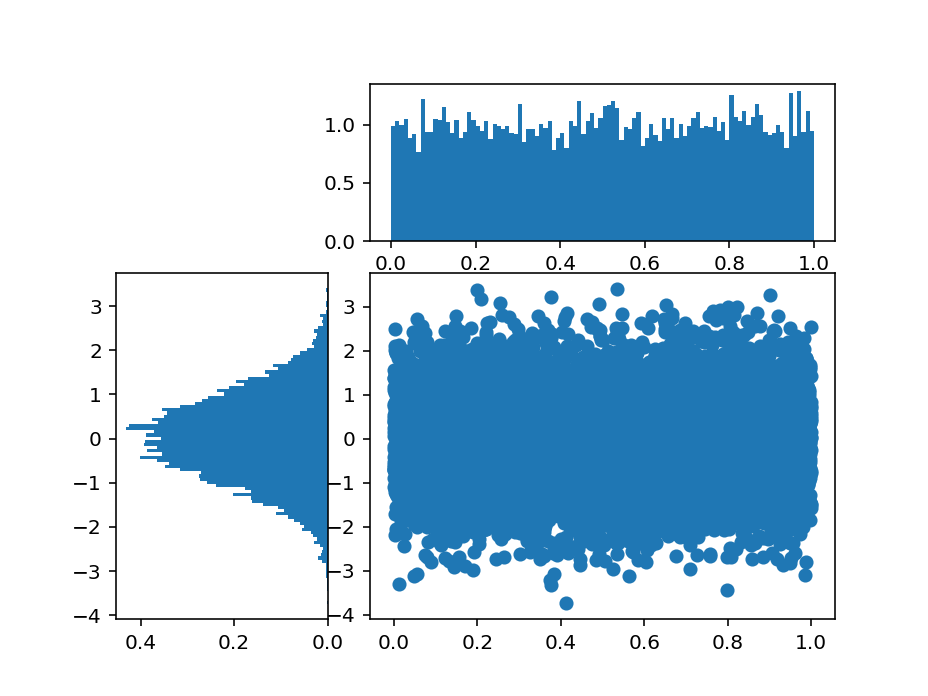

In [28]:
# use gridspec to partition the figure into subplots
## GridSpec allows to map axes over multiple cells in a gird
import matplotlib.gridspec as gridspec

plt.figure()
gspec = gridspec.GridSpec(3, 3)
## gspec is a list, since we pass the elements of gspec(list), the indexing starts at zero
top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])

In [29]:
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')
## actually, we do not care the yaxis for the top histogram, and the value of the x-axis for the bottom histogram

In [30]:
# clear the histograms and plot normed histograms
## normed = True tells matplotlib scale the frequency in the histogram between 0 and 1 
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


In [ ]:
# change axes limits, to similarize to sharex and sharey
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

In [32]:
%%HTML
<img src='http://educationxpress.mit.edu/sites/default/files/journal/WP1-Fig13.jpg' />

# Box and Whisker Plots

In [35]:
import pandas as pd
normal_sample = np.random.normal(loc=0.0, scale=1.0, size=10000)
random_sample = np.random.random(size=10000)
gamma_sample = np.random.gamma(2, size=10000)

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df.head(3)

,normal,random,gamma
0,0.212880,0.456521,1.144083
1,-1.556050,0.860374,1.901756
2,0.520756,0.618938,2.558299


In [34]:
df.describe()

,normal,random,gamma
count,10000.000000,10000.000000,10000.000000
mean,0.015645,0.502982,2.024053
std,0.999993,0.286640,1.431202
min,-3.812885,0.000233,0.012861
25%,-0.658719,0.258326,0.990752
50%,0.019900,0.503716,1.698607
75%,0.703419,0.753054,2.681254
max,3.644149,0.999980,13.024749


<IPython.core.display.Javascript object>


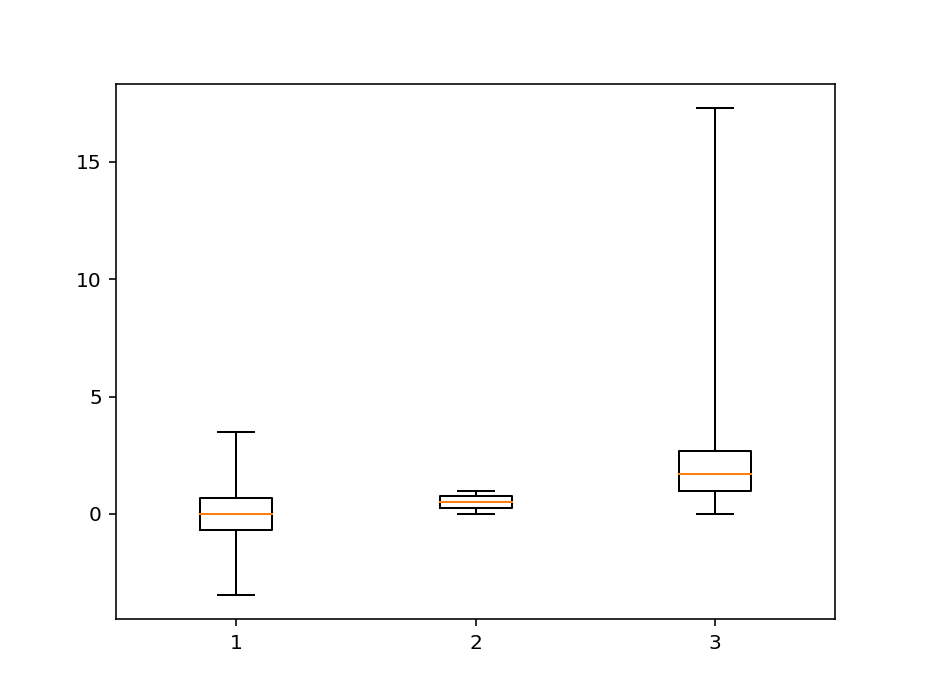

In [38]:
plt.figure()
## boxplot shows the minimum, maximum, median and interquartile
# create a boxplot of the normal data, assign the output to a variable to supress output
## In matplotlib, data needs to conform to numpy arrays
_ = plt.boxplot(df['normal'], whis='range')
## use _ to assign which we don't care about and won't use later, Jupyter notebook will print the output
## whis = 'range' tells the boxplot to set the whisker values all the way out to the minimum and maximum values

In [40]:
# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
## Here we did not normalize the scale, so distribution is quite ambiguous

<IPython.core.display.Javascript object>


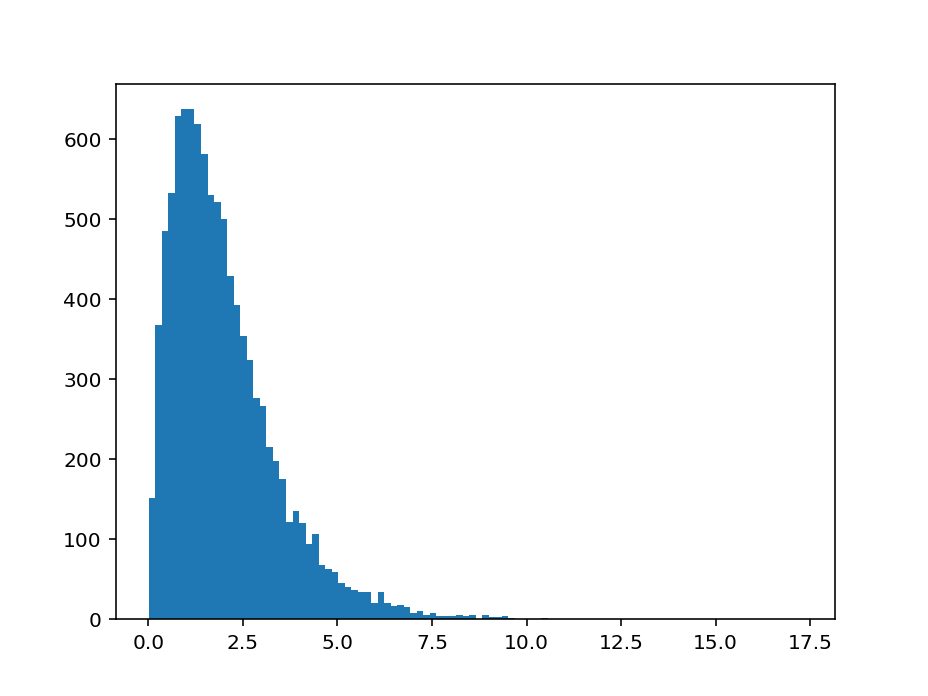

In [41]:
plt.figure()
_ = plt.hist(df['gamma'], bins=100)

<IPython.core.display.Javascript object>


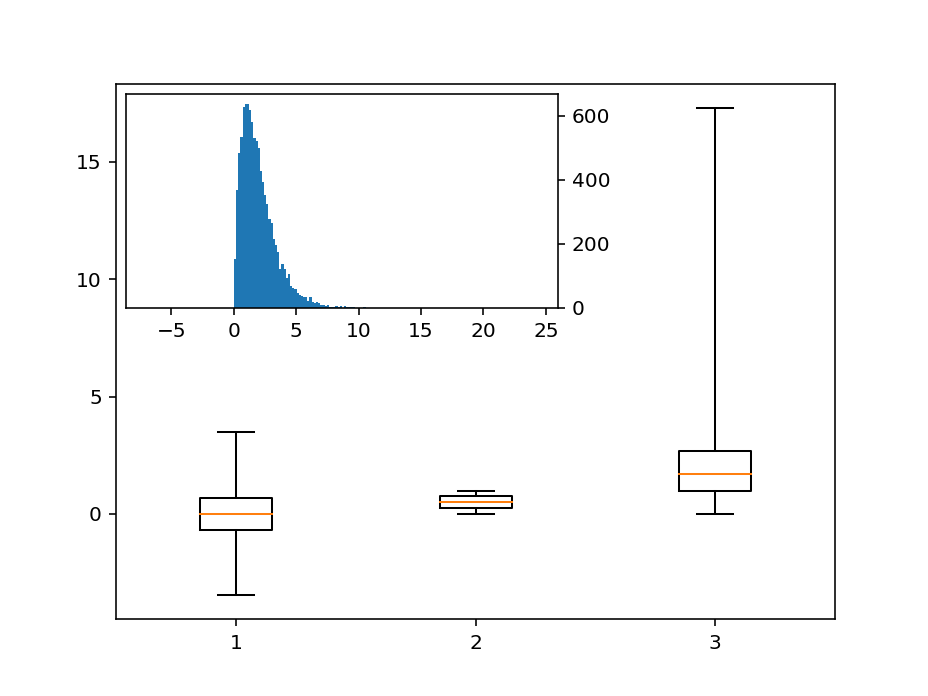

In [49]:
## 'inset_axes()': we can overlay an axis on top of another within a figure
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)  ## set the width and height of the parent axes
## loc = 2 is the place we want to drop the new axes
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [50]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


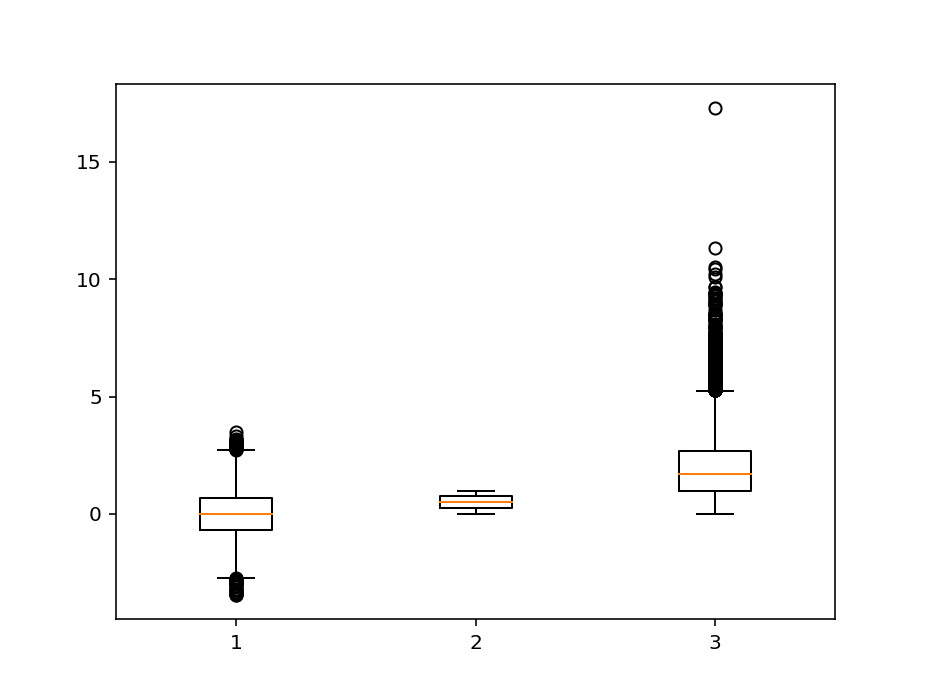

In [51]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )
## This is a god way to detect outliers, the data outside the whisker box called fliers

# Heatmaps

<IPython.core.display.Javascript object>


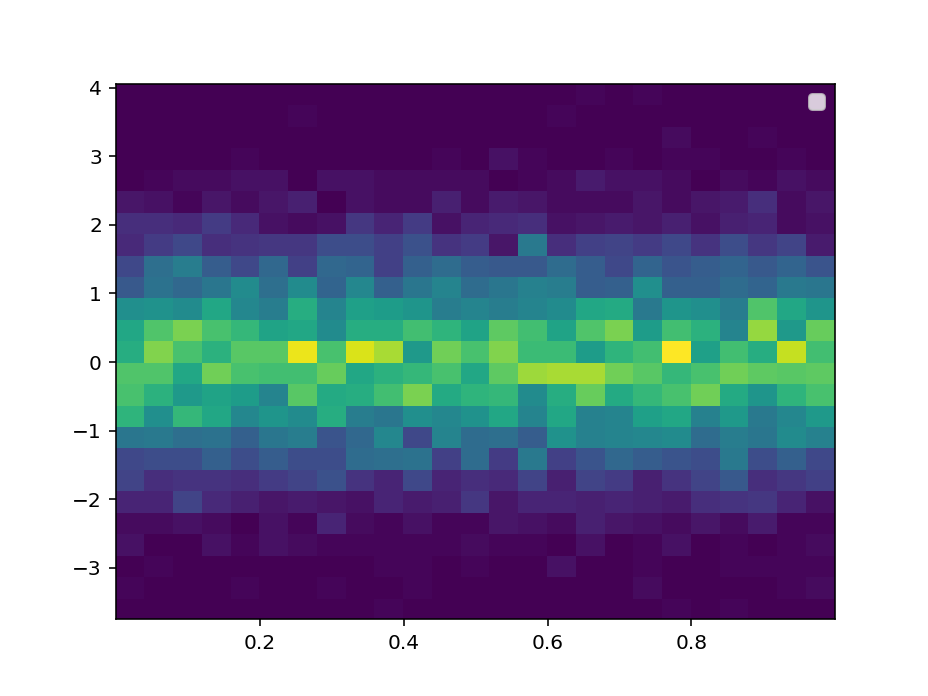

In [55]:
plt.figure()
## Two dimensional histogram -- heatmap
## Weather data is very good example of heatmap, x and y are latitude and logitude, the thrid dimension can be the temperature
## or rainfall amounts and use color to indicate its intensity.
Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size=10000)
_ = plt.hist2d(X, Y, bins=25)  ## histogram two dimensional
plt.legend(['Normal', 'Random'])
## If the data is ot continuous(categorical) which is not suitable for heatmap

<IPython.core.display.Javascript object>


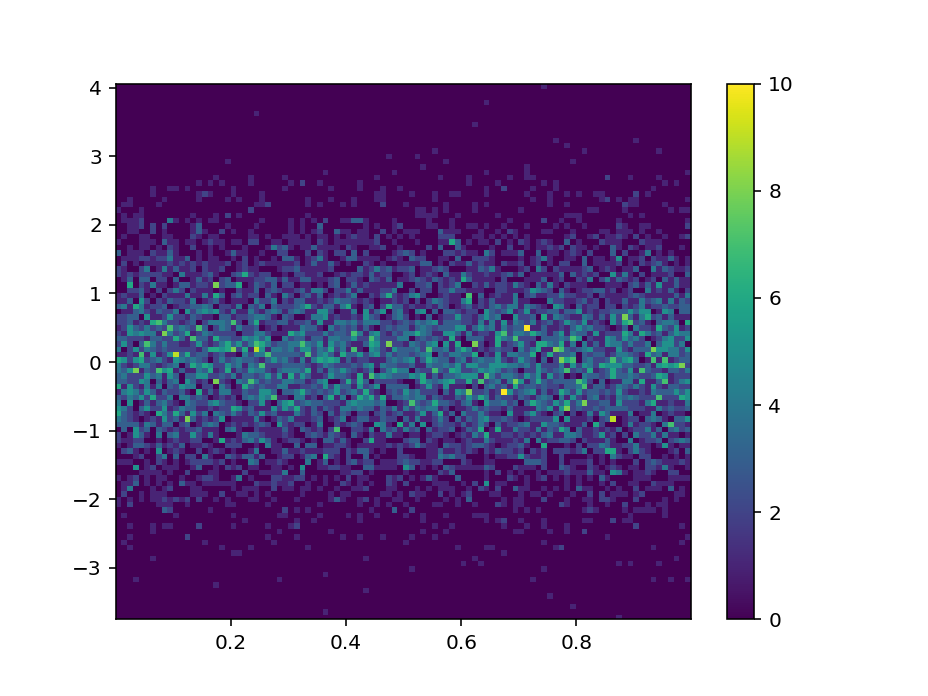

In [63]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
## if binsize is larger, then the color will be the same, since numbers are unique for each bin

In [64]:
# add a colorbar legend
plt.colorbar()

# Animations

In [97]:
## we call this the backend that renders the plot to the stream(animation and interactivity)
import matplotlib.animation as animation

n = 100
x = np.random.randn(n)
x

array([ 0.82612622, -0.15207143, -1.27297897, -0.80440354, -0.60632788,
        0.72579106,  0.31686457, -0.92162958, -1.02366249, -1.58780416,
       -0.56951394, -2.02787741, -1.2379031 , -0.54986579,  2.46697828,
       -1.02890755,  2.04271611,  0.45421351, -0.80974302,  0.28672738,
        1.14538956,  0.45904231, -0.70940075,  1.78312841,  0.65654353,
        0.32825642, -0.7719664 ,  0.21987711, -0.97811437, -0.34307926,
        1.3878955 ,  0.3954695 ,  0.91183169, -0.36720334,  1.3540096 ,
       -1.04343318, -0.64532294, -0.29552611, -0.25800582,  0.54313942,
        0.44285914,  0.19506429,  1.51618552,  0.9104188 , -0.31665064,
       -0.42084025,  0.17681482, -0.81040109, -0.49998973, -0.1391051 ,
        0.01011967,  0.33378234, -0.54984516, -0.29848519, -0.95770147,
        1.29392   ,  0.62343187, -1.26609816,  0.00415759, -1.14548918,
       -1.27695827, -0.54639608, -0.1166415 ,  0.74905617, -0.35260091,
       -0.72467203, -0.58934148,  1.05537649, -2.22491602,  0.43

In [98]:
# create the function that will do the plotting, where curr is the current frame
## FuncAnimation, it builds an animation by iteratively calling a function which we defined
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()  ## call the animation a
    plt.cla()
    ## passing the space in between bins
    ## since we want all of our bins set and evenly spaced, because we are drawing the animation in each clock tick
    bins = np.arange(-4, 4, 0.5)  ## ensures that the bins will not change
    plt.hist(x[:curr], bins=bins)
    ## we need to set the x-axis values, bc the histogram will continually autoscale between frames which could be annoying
    plt.axis([-4,4,0,30])
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])
    ## plt.annotate() palces text at a certain position in the chart, shows how many samples are currently in the screen

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


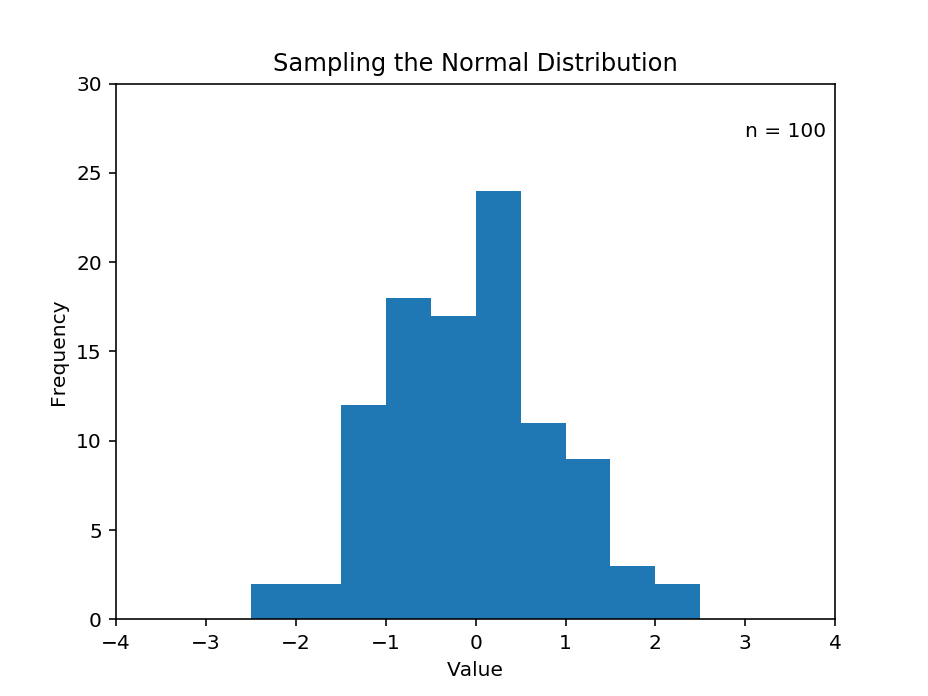

In [99]:
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval=100)
## interval = 100 parameter is the amount of time we want between updates, 100 miliseconds
## we have to set this variable 'a', otherwise, our function does not know how to stop the animation

# Interactivity

<IPython.core.display.Javascript object>


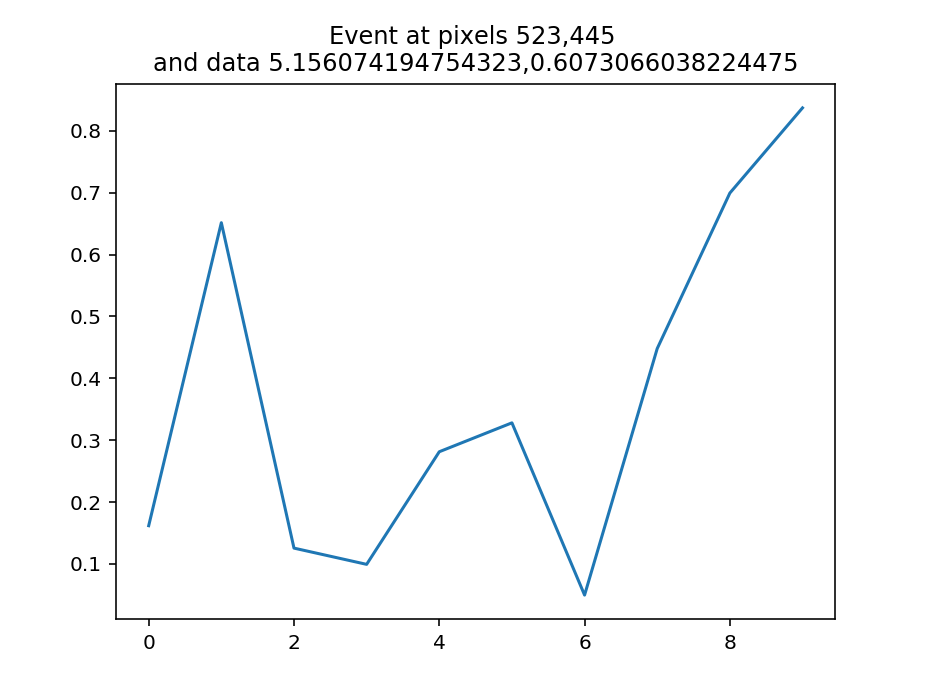

7

In [74]:
plt.figure()
data = np.random.rand(10)  ## random from uniform distribution 
plt.plot(data)
## interact the information showing in title
def onclick(event):
    plt.cla()
    plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))
## We need to connect the onclick event with the event
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
plt.gcf().canvas.mpl_connect('button_press_event', onclick)

In [75]:
## In this course, we focus on pick event which allows you to respond when the user is actually clicked on a visual element
from random import shuffle
origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins)

df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
df

,height,weight,origin
0,0.351462,0.325180,Iraq
1,0.508620,0.994829,India
2,0.871373,0.808495,Chile
3,0.525670,0.576056,Canada
4,0.907767,0.218636,Germany
5,0.112619,0.021019,China
6,0.251859,0.795608,Brazil
7,0.886779,0.658368,UK
8,0.293947,0.403553,USA
9,0.011320,0.858693,Mexico


<IPython.core.display.Javascript object>


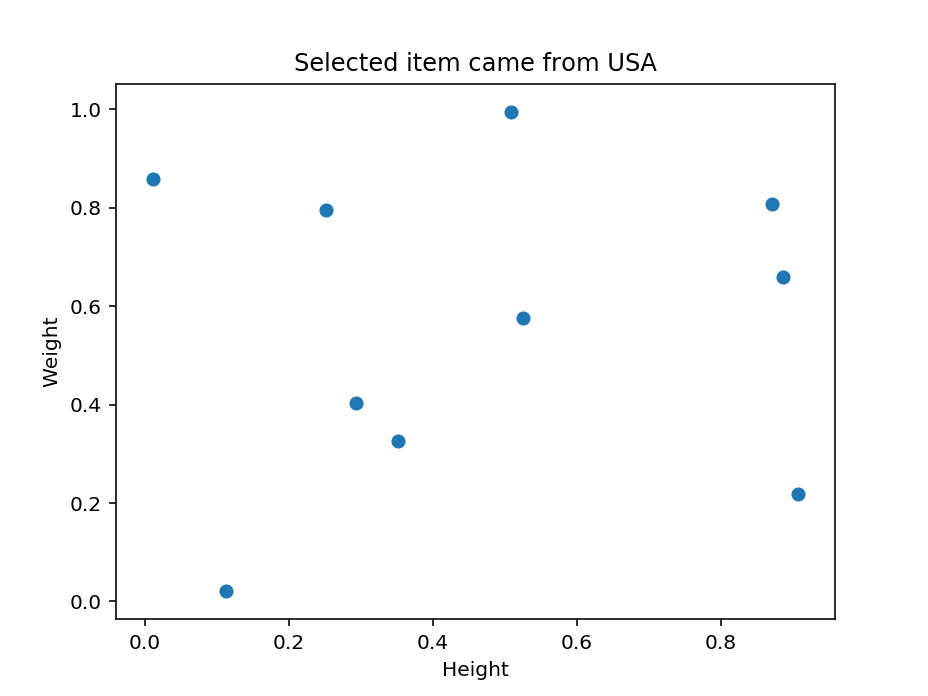

Text(0.5, 0, 'Height')

In [78]:
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

In [79]:
def onpick(event):
    origin = df.iloc[event.ind[0]]['origin']
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick)

7

# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


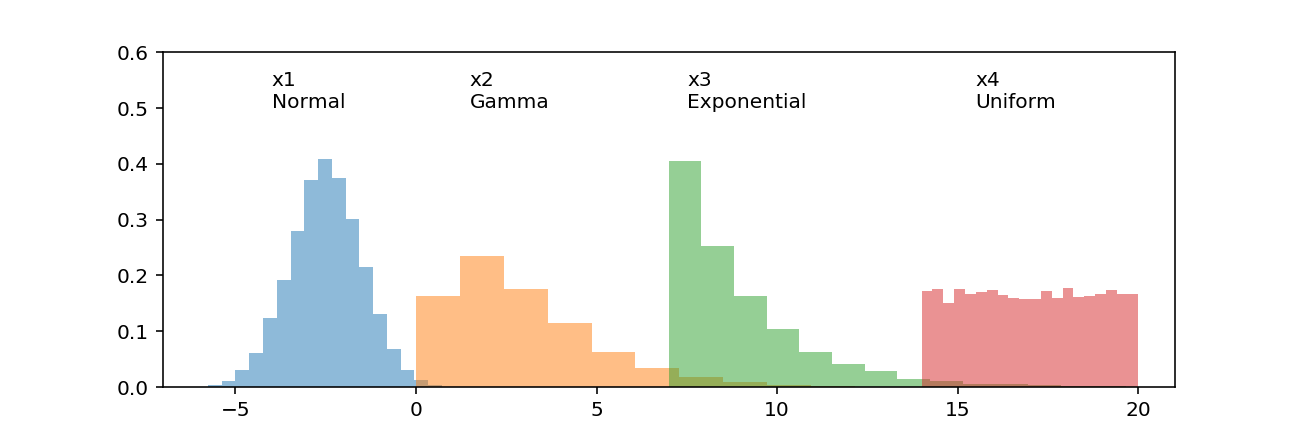

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(15.496689630464662, 0.5, 'x4\nUniform')

In [108]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)


# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


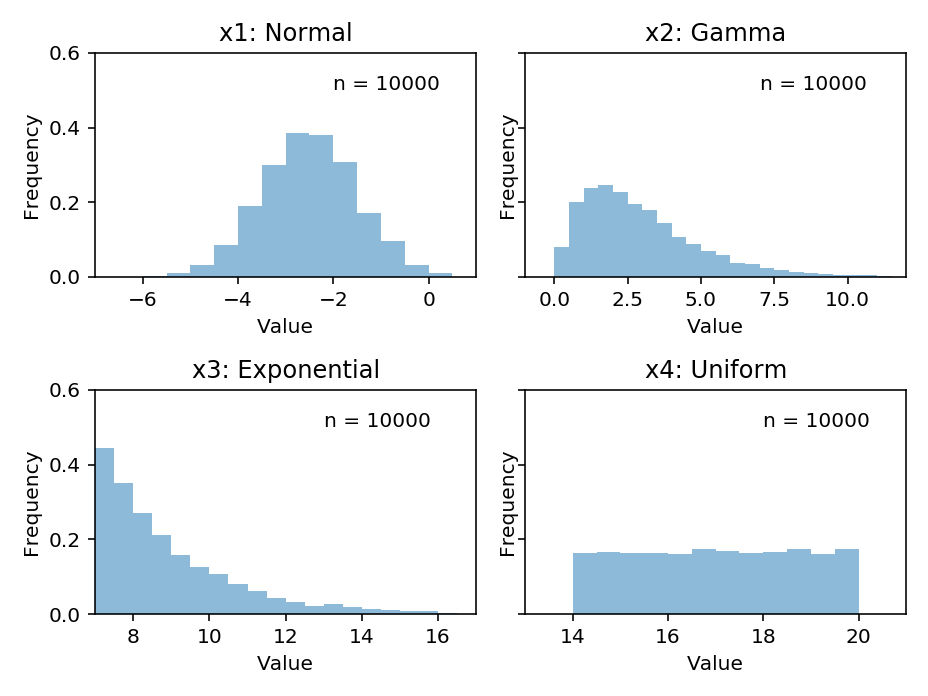

In [129]:
axis1 = [-7, 1, 0, 0.6]
axis2 = [-1, 12, 0, 0.6]
axis3 = [7, 17, 0, 0.6]
axis4 = [13, 21, 0, 0.6]
axis = [axis1, axis2, axis3, axis4]

bin1 = np.arange(-7, 1, 0.5)
bin2 = np.arange(-1, 12, 0.5)
bin3 = np.arange(7, 17, 0.5)
bin4 = np.arange(13, 21, 0.5)
bins = [bin1, bin2, bin3, bin4]

x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
x = [x1, x2, x3, x4]

titles = ['x1: Normal', 'x2: Gamma', 'x3: Exponential', 'x4: Uniform']
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey = True)
axs = [ax1, ax2, ax3, ax4]

location = [-2, 7, 13, 18]
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 100: 
        a.event_source.stop()  ## call the animation a
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:100*curr], normed = True, bins = bins[i], alpha = 0.5)
        axs[i].axis(axis[i])
        axs[i].set_title(titles[i])
        axs[i].set_ylabel('Frequency')
        axs[i].set_xlabel('Value')
        axs[i].annotate('n = {}'.format(curr*100), [location[i], 0.5])
    plt.tight_layout()

In [130]:
a = animation.FuncAnimation(fig, update, interval=100)

In [118]:
## Solution
import matplotlib.animation as animation

In [119]:
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)
x = [x1, x2, x3, x4]
axis1 = [-7,1,0,0.6]
axis2 = [-1,12,0,0.6]
axis3 = [7,17,0,0.6]
axis4 = [13,21,0,0.6]
axis = [axis1, axis2, axis3, axis4]

In [120]:
bin1 = np.arange(-7,1,0.5)
bin2 = np.arange(-1,12,0.5)
bin3 = np.arange(7,17,0.5)
bin4 = np.arange(13,21,0.5)
bins = [bin1, bin2, bin3, bin4]

In [121]:
titles = ['x1: Normal', 'x2: Gamma', 'x3: Exponential', 'x4: Uniform']

In [122]:
anno_x = [-2, 7, 13, 18]

<IPython.core.display.Javascript object>


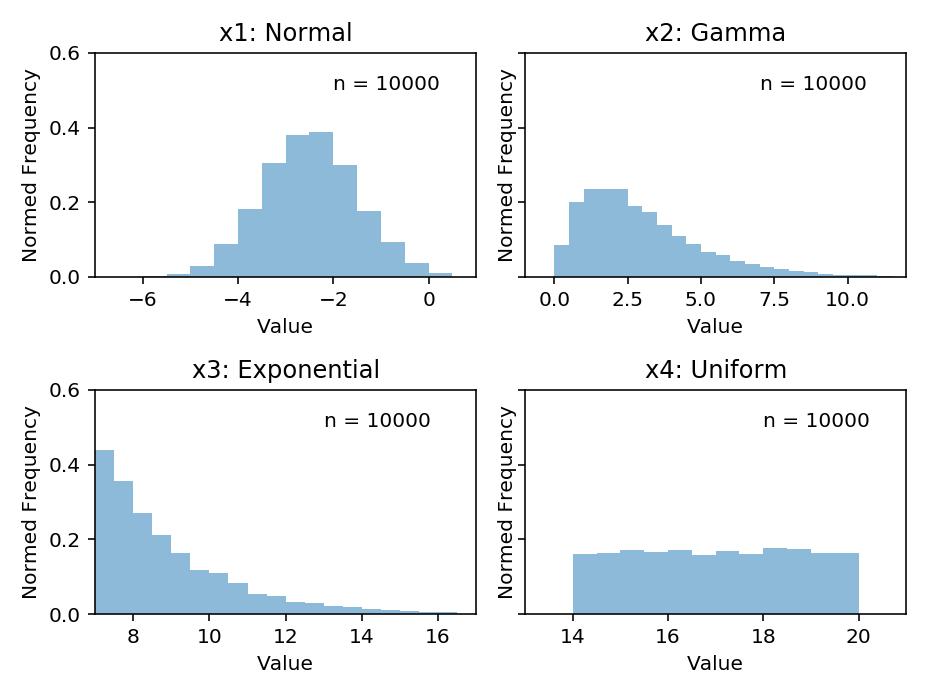

In [123]:

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True)
axs = [ax1,ax2,ax3,ax4]

In [124]:
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == 100: 
        a.event_source.stop()
    for i in range(len(axs)):
        axs[i].cla()
        axs[i].hist(x[i][:100*curr], normed=True, bins=bins[i], alpha=0.5)
        axs[i].axis(axis[i])
        axs[i].set_title(titles[i])
        axs[i].set_ylabel('Normed Frequency')
        axs[i].set_xlabel('Value')
        axs[i].annotate('n = {}'.format(100*curr), [anno_x[i],0.5])
    plt.tight_layout() # automatically adjust the locations of axes

In [125]:
a = animation.FuncAnimation(fig, update, interval=100)